# Ejercicios UMAP 

FALTA REVISAR y TERMINAR PARTE 4

- Instalar umap-learn y densmap-learn.

- Descargar el dataset de Fashion MNIST del siguiente enlace:
    
    https://github.com/zalandoresearch/fashion-mnist

    Tendrás que descomprimir los ficheros \*gz para que el código funcione. Asegúrate que el path utilizado para cargar los datos sea el correcto.


## 1. UMAP en Fashion MNIST

Primero realizaremos una reducción de dimensionalidad no supervisada mediante UMAP. Estableceremos el número de vecinos en 5 porque estamos interesados solo en la información local. Reduciremos el número de dimensiones a 2.

In [1]:

import umap
import numpy as np
import seaborn as sns
from   mnist import MNIST
import matplotlib.pyplot as plt
from   sklearn.cluster import KMeans
from   sklearn.datasets import fetch_openml
from   sklearn.model_selection import train_test_split
from   sklearn.metrics import adjusted_mutual_info_score


In [2]:
#%matplotlib inline

sns.set_theme(style='white', context='poster')

#En la carperta Fashion-MNIST están descargado los datos
mndata = MNIST('data/fashion')

X_train, y_train = mndata.load_training()
X_test,  y_test  = mndata.load_testing()

data = np.array(np.vstack([X_train, X_test]), dtype=np.float64) / 255.0
target = np.hstack([y_train, y_test])
classes = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot']

embedding1 = umap.UMAP(n_neighbors=10).fit_transform(data)

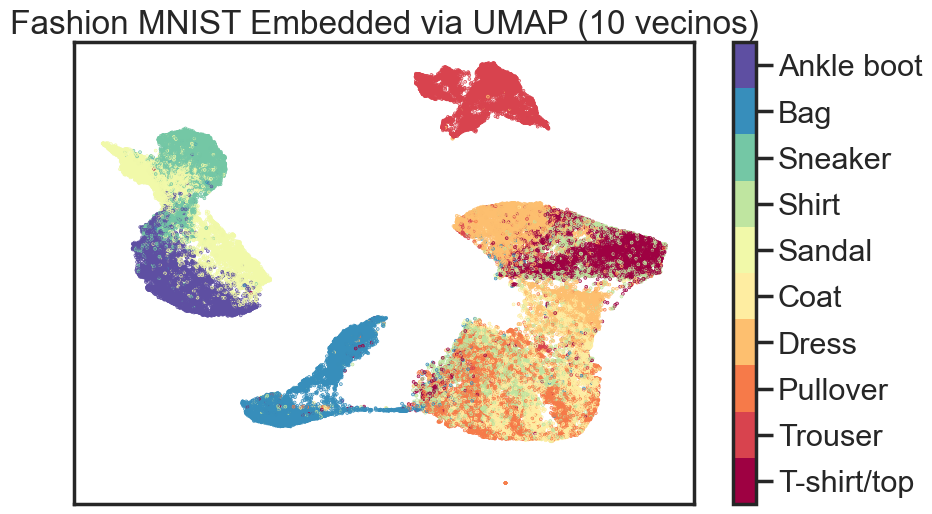

In [3]:
fig, ax = plt.subplots(1, figsize=(10, 6))
plt.scatter(*embedding1.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP (10 vecinos)');

Aplicamos DensMAP para comparar los resultados con el algoritmo UMAP clásico.

In [4]:
mapper1 = umap.UMAP(densmap=True, n_neighbors=10).fit(data)

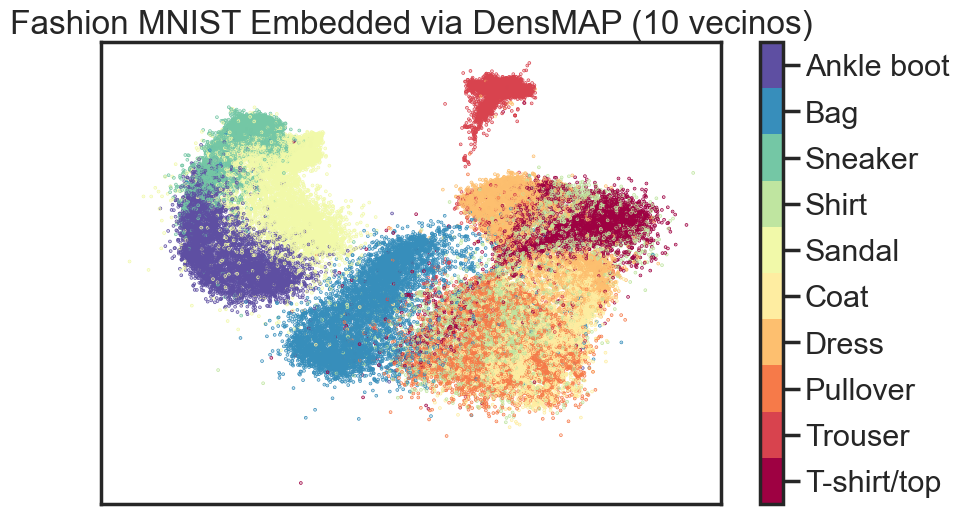

In [5]:
fig, ax = plt.subplots(1, figsize=(10, 6))
plt.scatter(*mapper1.embedding_.T, s=0.3, c=np.array(target), cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via DensMAP (10 vecinos)');

## 2. Utilizando etiquetas para separar clases (Supervised UMAP)

Para realizar esta versión supervisada de UMAP introduciremos las etiquetas en el parámetro 'y' de la función 'fit' de UMAP. En este caso se utilizará un número mayor de vecinos (podemos poner 15). UMAP también permite hacer hacer aprendizaje semi-supervisado.

In [6]:
embedding2 = umap.UMAP(n_neighbors=15).fit_transform(data, y=target)

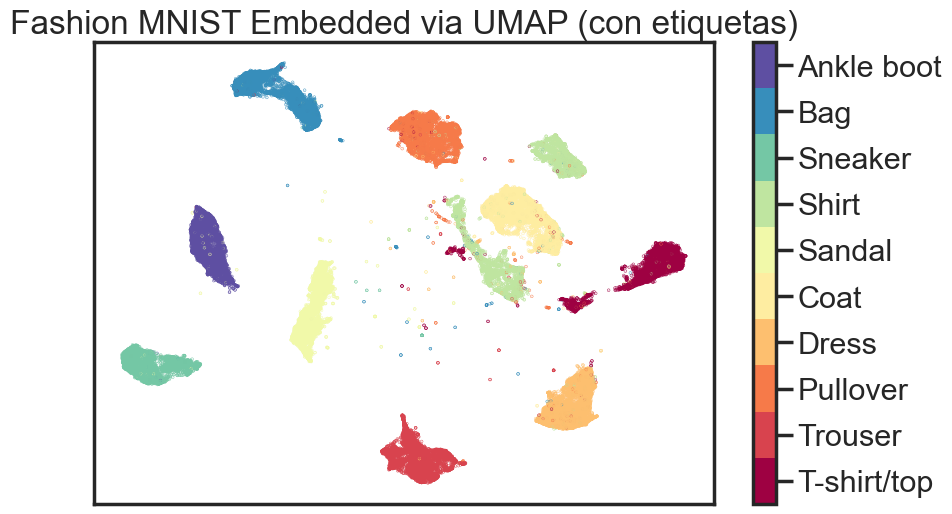

In [7]:

fig, ax = plt.subplots(1, figsize=(10, 6))
plt.scatter(*embedding2.T, s=0.1, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP (con etiquetas)');

Aplicamos el algoritmo DensMAP para comparar con el UMAP clásico.

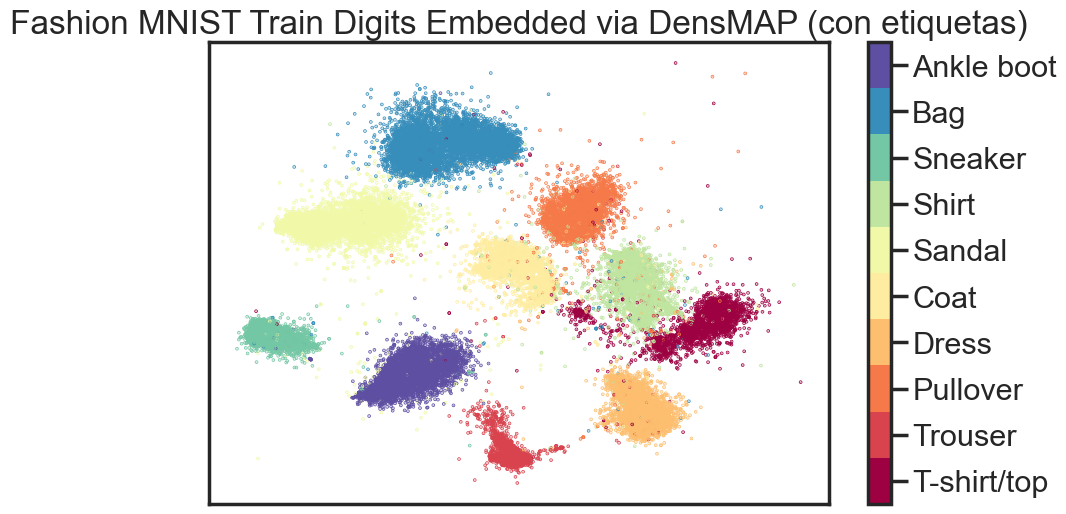

In [8]:
mapper2 = umap.UMAP(densmap=True, n_neighbors=15).fit(data, np.array(target))

fig, ax = plt.subplots(1, figsize=(10, 6))
plt.scatter(*mapper2.embedding_.T, s=0.3, c=np.array(target), cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Train Digits Embedded via DensMAP (con etiquetas)');

## 3. Entrenamiento con etiquetas y embedding con test no etiquetado (Metric Learning with UMAP)

Veamos como se puede utilizar UMAP en aprendizaje métrico, es decir, aprender un embedding supervisado de los datos y utilizar datos nuevos para clasificar a partir de una métrica aprendida como una medida de la distancia entre nuevos puntos no etiquetados. Este procedimiento no lo podemos aplicar con DensMAP porque DensMAP no permite transformar datos a un "embedding" entrenado con otro dataset (train), por lo que utilizarem UMAP clásico. 

Para ello utiliza la división entre train y test proporcionada por Fashion MNIST y visualiza los resultados.

In [9]:
embedding3 = umap.UMAP(n_neighbors=15).fit_transform(X_train, y=y_train)

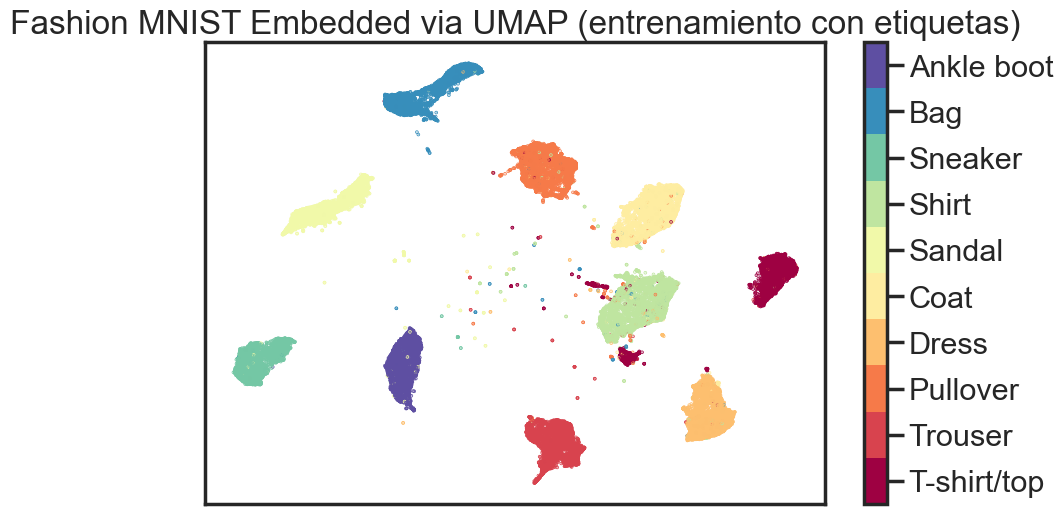

In [10]:
fig, ax = plt.subplots(1, figsize=(10, 6))
plt.scatter(*embedding3.T, s=0.3, c=y_train, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP (entrenamiento con etiquetas)');

In [11]:
umap_model = umap.UMAP(n_neighbors=15).fit(X_train, y=y_train)
embedding_test = umap_model.transform(X_test)

Text(0.5, 1.0, 'Fashion MNIST Embedded via UMAP (prueba sin etiquetas)')

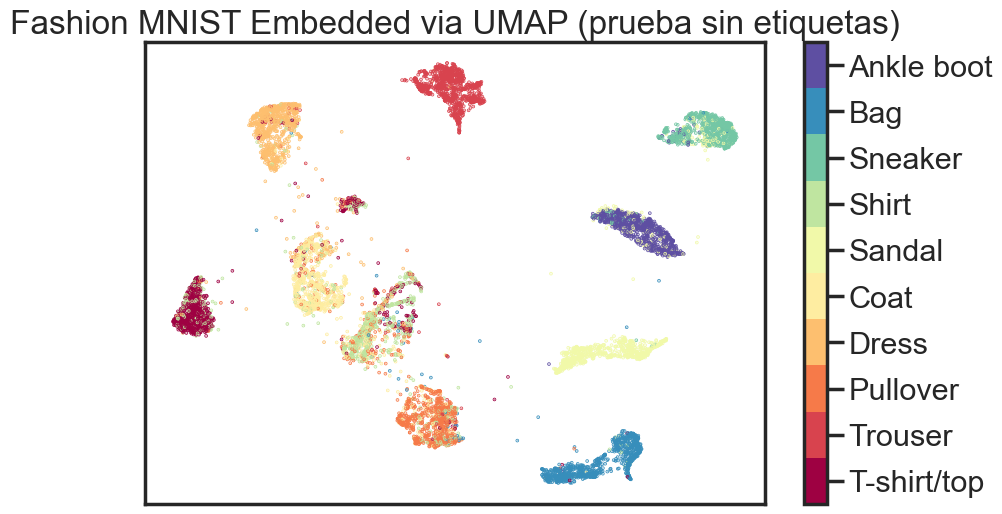

In [12]:
fig, ax = plt.subplots(1, figsize=(10, 6))
plt.scatter(*embedding_test.T, s=0.3, c=y_test, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP (prueba sin etiquetas)')

## 4. Agrupamiento (clustering)

UMAP puede utilizarse para el preprocesado de datos para mejorar el desempeño de algoritmos de clustering basados en la densidad. A pesar de que UMAP no mantiene completamente la densidad del conjunto de datos, siguen habiendo razones válidas para usar UMAP para el preprocesado previo al agrupamiento. 

1. Representa el `adjusted_mutual_info_score` en función del `número de vecinos` en el embedding (entre 4 y 10 de 2 en 2) y el `min_dist` (3 puntos entre 0 y 1).
2. Representa el resultado del embedding de la mejor combinación de parámetros.

Utiliza un K-Means con 10 clusters, ya que sabemos de antemano el número de clusters en los que se divide el conjunto de datos.

In [13]:
n_neighbors_list = list(range(4, 11, 2))
min_dist_list = np.linspace(0, 1, 3)

best_score = -1
best_params = {}

for n_neighbors in n_neighbors_list:
    for min_dist in min_dist_list:
        embedding = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist).fit_transform(data)
        labels = KMeans(n_clusters=10, random_state=42).fit_predict(embedding)
        ami_score = adjusted_mutual_info_score(target, labels)
        print(f"n_neighbors={n_neighbors}, min_dist={min_dist}, AMI Score={ami_score}")
        
        if ami_score > best_score:
            best_score = ami_score
            best_params = {'n_neighbors': n_neighbors, 'min_dist': min_dist}

c:\Users\Carlos\anaconda3\envs\DS_2324\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_neighbors=4, min_dist=0.0, AMI Score=0.6050988370651672


c:\Users\Carlos\anaconda3\envs\DS_2324\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_neighbors=4, min_dist=0.5, AMI Score=0.5671944835888283


c:\Users\Carlos\anaconda3\envs\DS_2324\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_neighbors=4, min_dist=1.0, AMI Score=0.32726561398518617


c:\Users\Carlos\anaconda3\envs\DS_2324\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_neighbors=6, min_dist=0.0, AMI Score=0.6243617337739455


c:\Users\Carlos\anaconda3\envs\DS_2324\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_neighbors=6, min_dist=0.5, AMI Score=0.5784235167236879


c:\Users\Carlos\anaconda3\envs\DS_2324\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_neighbors=6, min_dist=1.0, AMI Score=0.5572117371839503


c:\Users\Carlos\anaconda3\envs\DS_2324\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_neighbors=8, min_dist=0.0, AMI Score=0.6426746858484107


c:\Users\Carlos\anaconda3\envs\DS_2324\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_neighbors=8, min_dist=0.5, AMI Score=0.5778435067142634


c:\Users\Carlos\anaconda3\envs\DS_2324\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_neighbors=8, min_dist=1.0, AMI Score=0.5670142581676949


c:\Users\Carlos\anaconda3\envs\DS_2324\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_neighbors=10, min_dist=0.0, AMI Score=0.6436929398763511


c:\Users\Carlos\anaconda3\envs\DS_2324\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_neighbors=10, min_dist=0.5, AMI Score=0.5837553523400673


c:\Users\Carlos\anaconda3\envs\DS_2324\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_neighbors=10, min_dist=1.0, AMI Score=0.5649632380782695


c:\Users\Carlos\anaconda3\envs\DS_2324\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


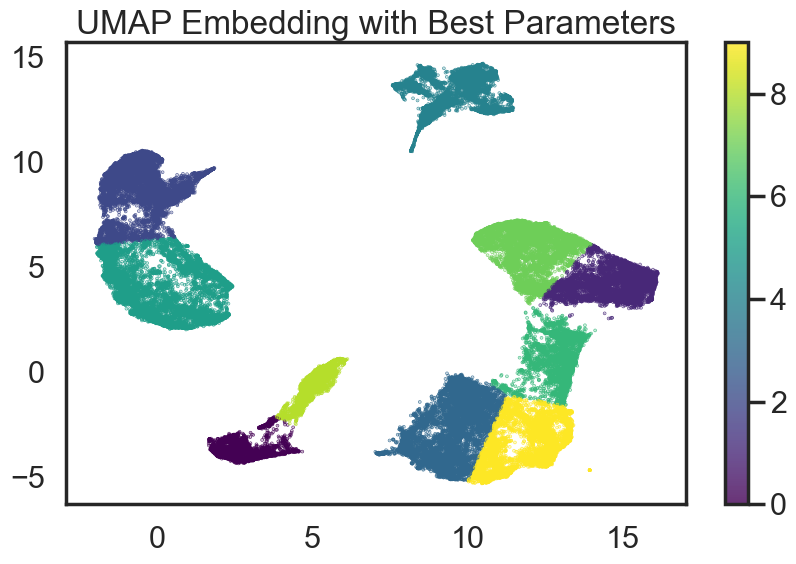

In [14]:
best_embedding = umap.UMAP(n_neighbors=best_params['n_neighbors'], min_dist=best_params['min_dist']).fit_transform(data)
best_labels = KMeans(n_clusters=10, random_state=42).fit_predict(best_embedding)

plt.figure(figsize=(10, 6))
plt.scatter(*best_embedding.T, s=0.3, c=best_labels, cmap='viridis', alpha=0.8)
plt.colorbar()
plt.title('UMAP Embedding with Best Parameters')
plt.show()